# Heart Disease Prediction

In this machine learning project, I have collected the dataset from Kaggle and I will be using Machine Learning to predict whether any person is suffering from heart disease

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Here we will be experimenting with 3 algorithms

1. KNeighborsClassifier
2. DecisionTreeClassifier
3. RandomForestClassifier
4. Logistic Regression

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
df = pd.read_csv('dataset.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000




## FEATURE SELECTION

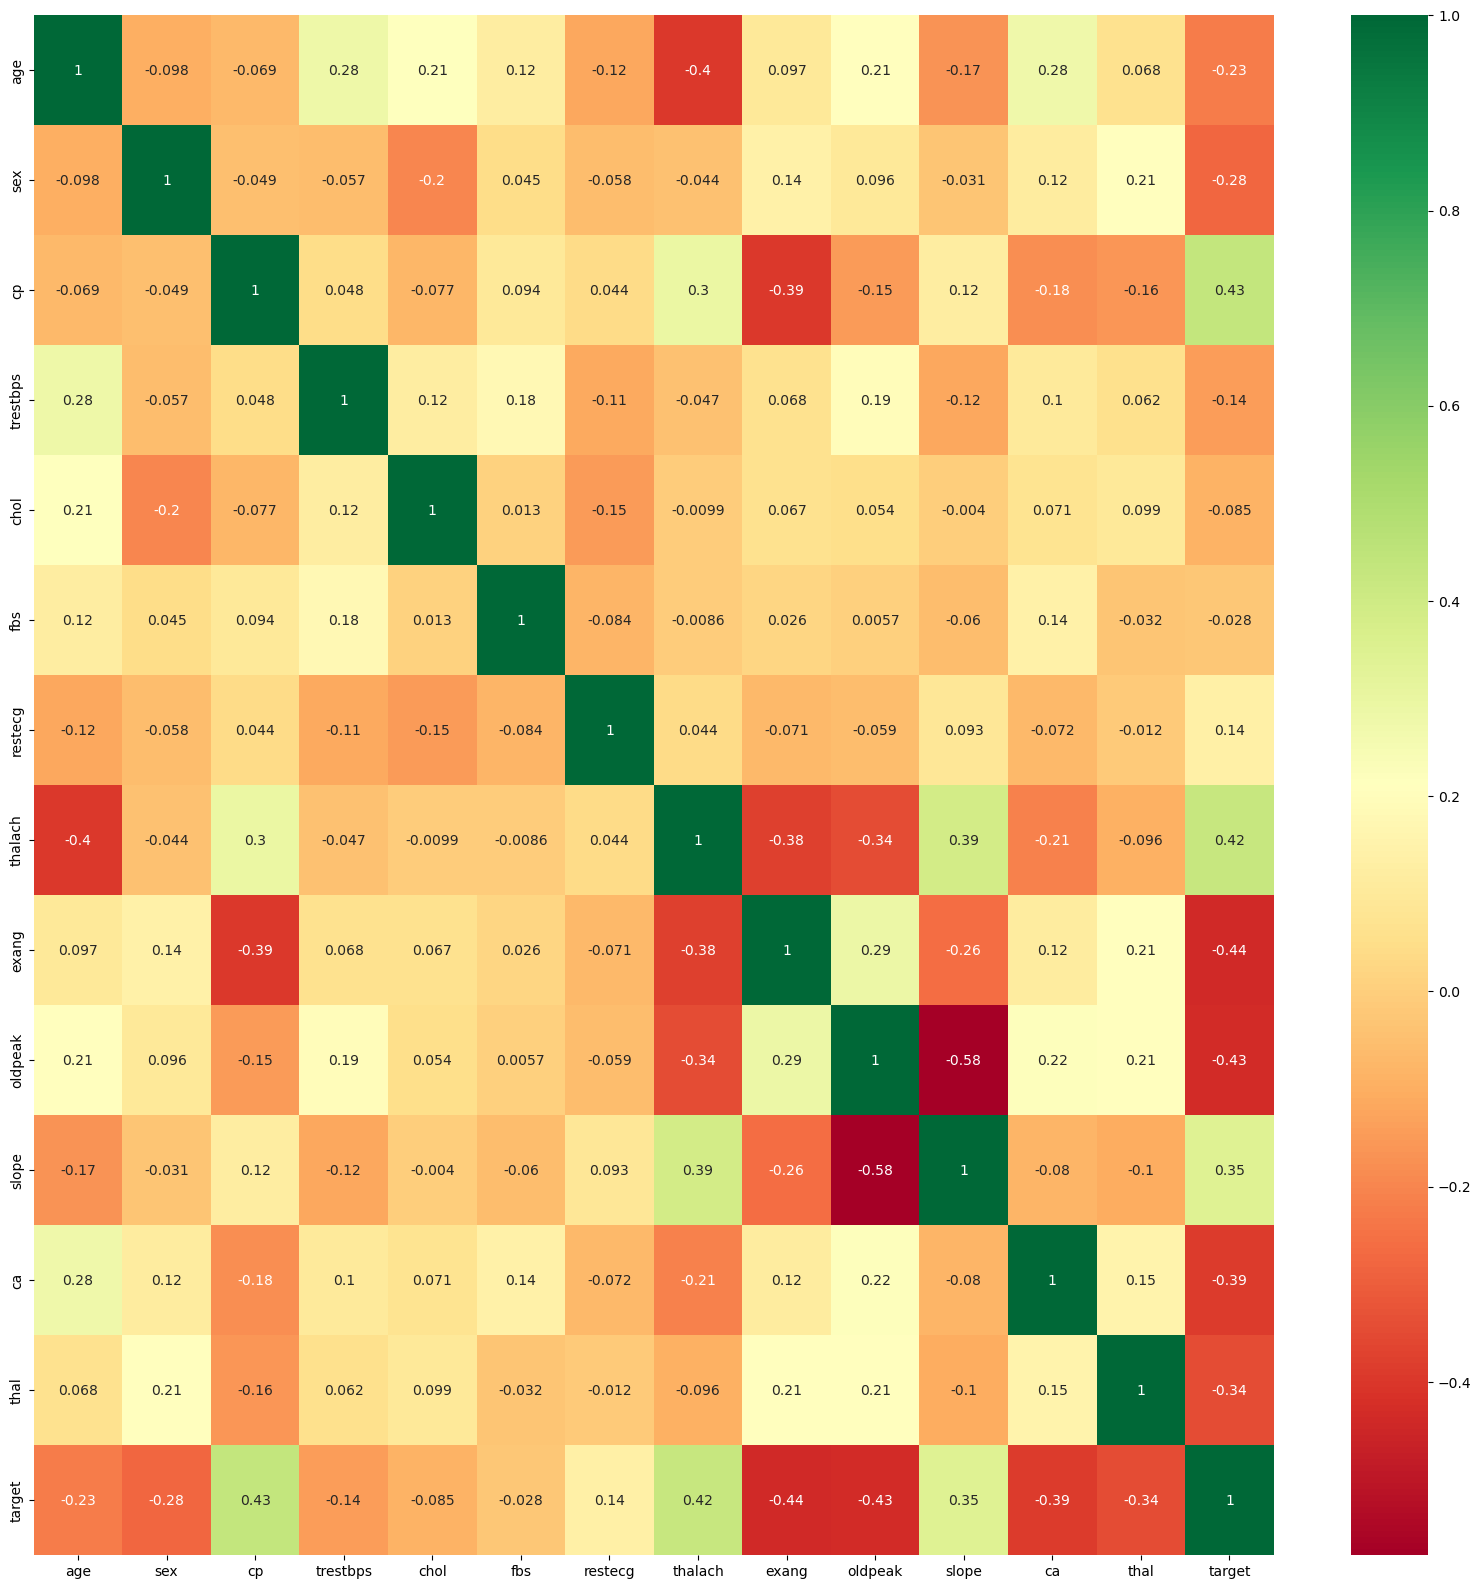

In [6]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [46]:
categorical_val = []
continous_val = []
for column in df.columns:
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        print("--------------")
        categorical_val.append(column)
    else:
        print("...............")
        continous_val.append(column)

age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
...............
sex : [1 0]
--------------
cp : [3 2 1 0]
--------------
trestbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
...............
chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 4

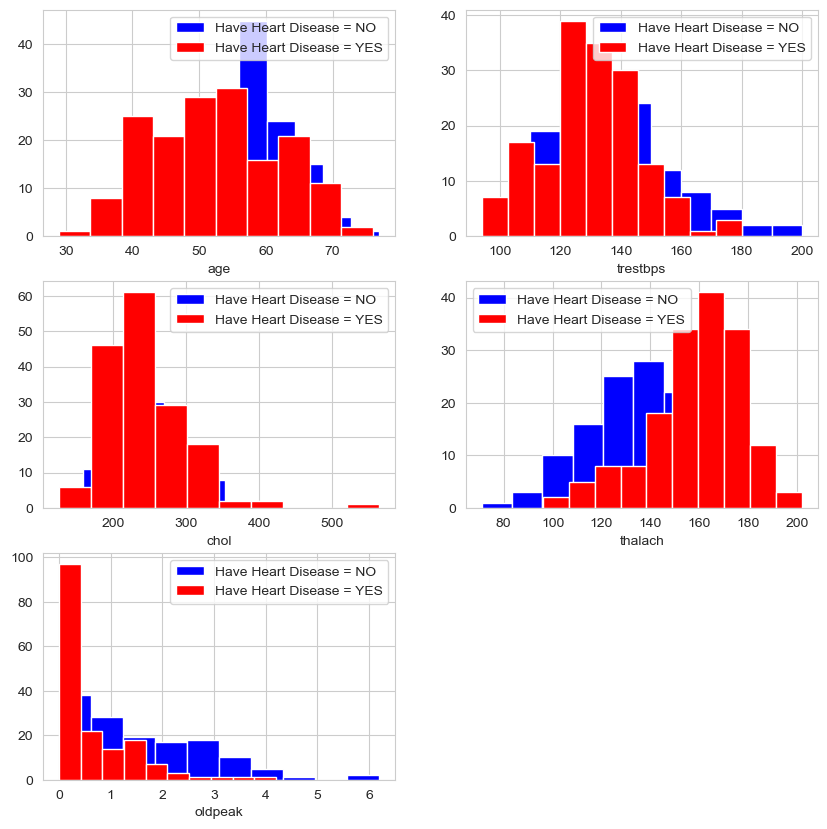

In [47]:
plt.figure(figsize=(10, 10))

for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 2, i)
    df[df["target"] == 0][column].hist( color='blue', label='Have Heart Disease = NO')
    df[df["target"] == 1][column].hist(color='red', label='Have Heart Disease = YES')
    plt.legend()
    plt.xlabel(column)

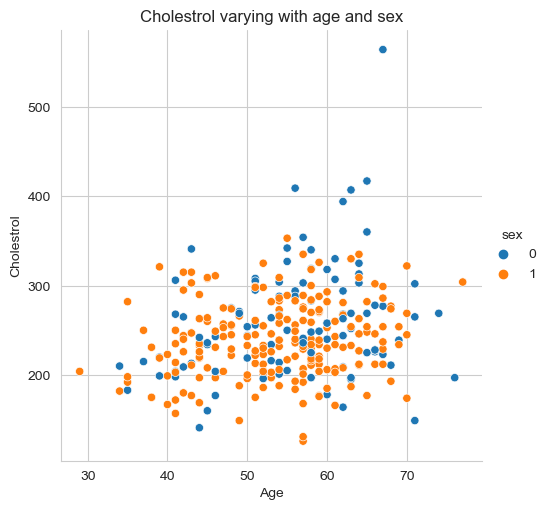

In [40]:
sns.relplot(kind="scatter", x="age", y="chol", data=df, hue="sex")
plt.title("Cholestrol varying with age and sex")
plt.xlabel("Age")
plt.ylabel("Cholestrol")
plt.show()

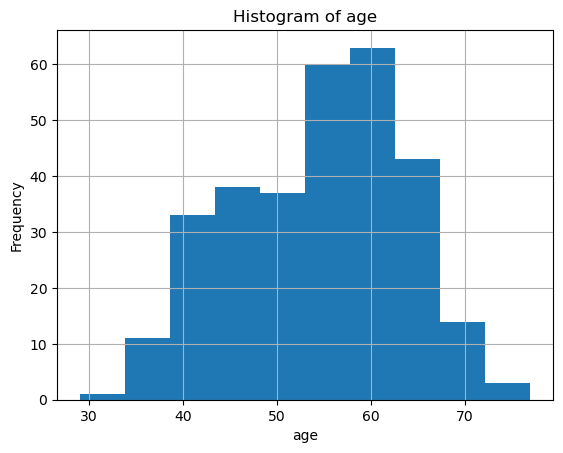

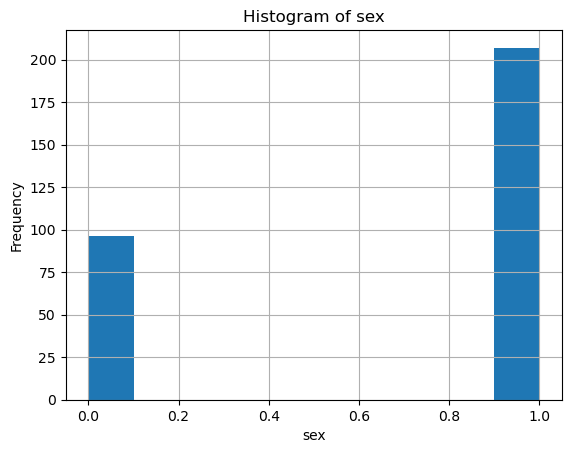

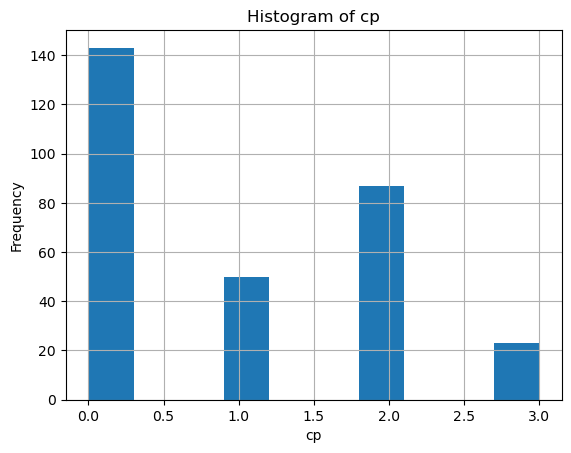

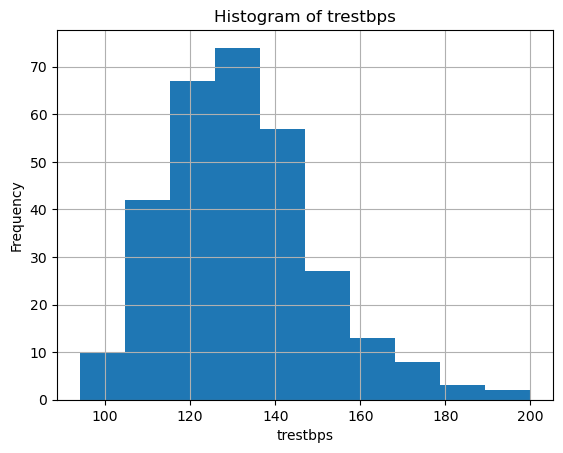

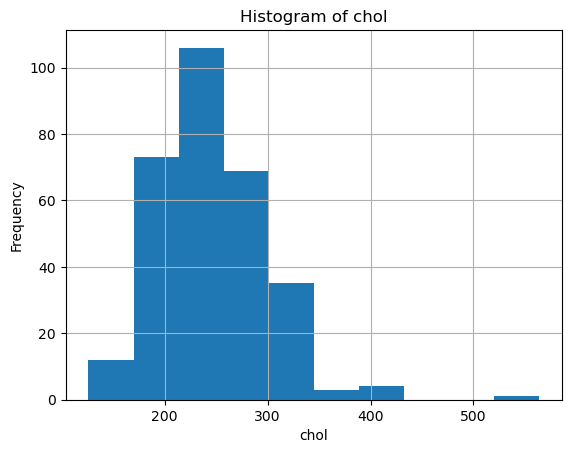

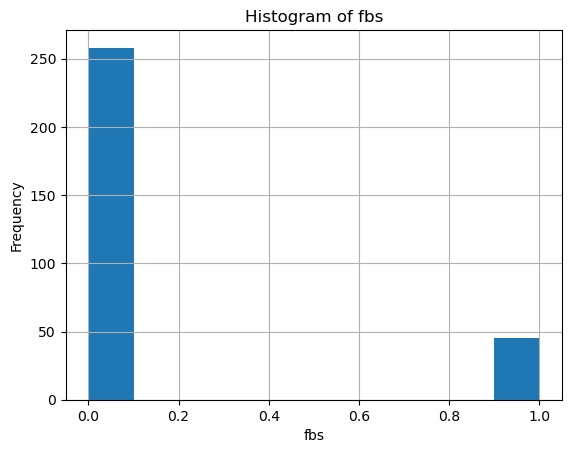

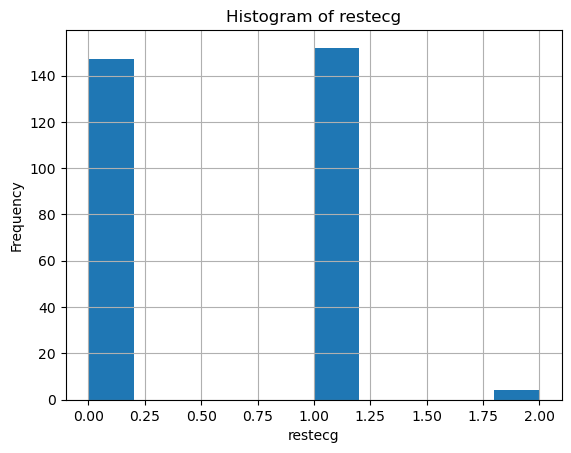

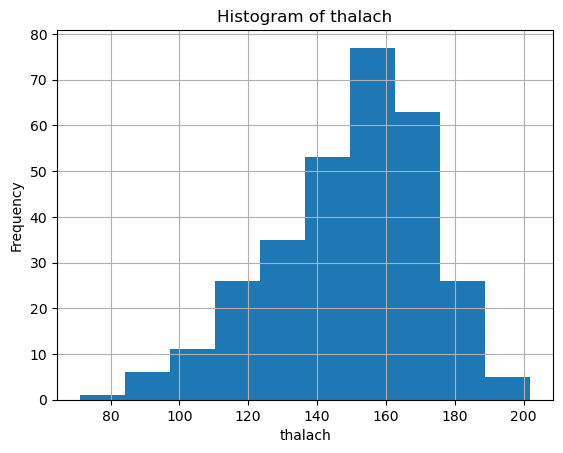

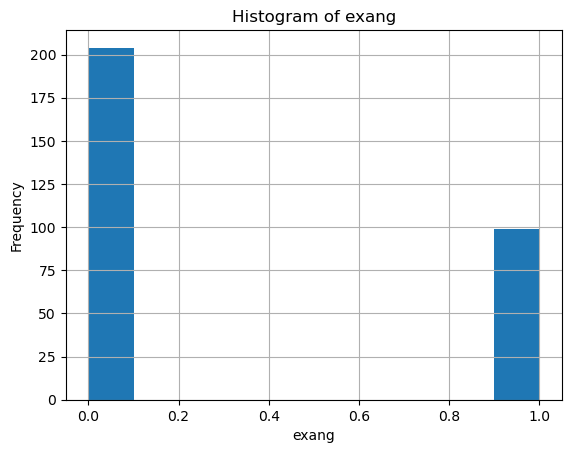

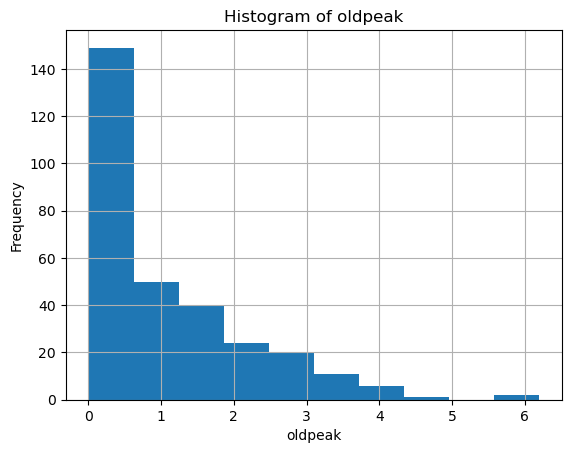

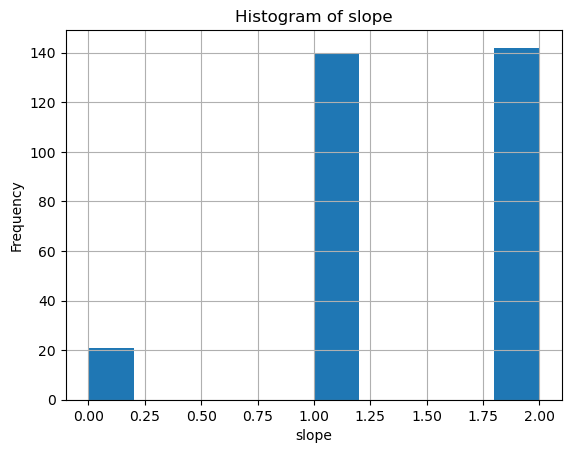

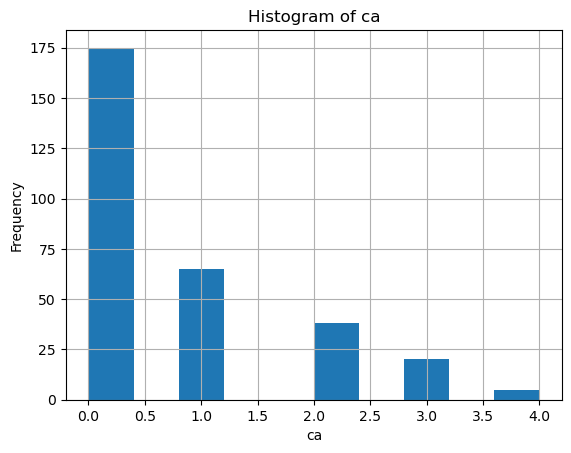

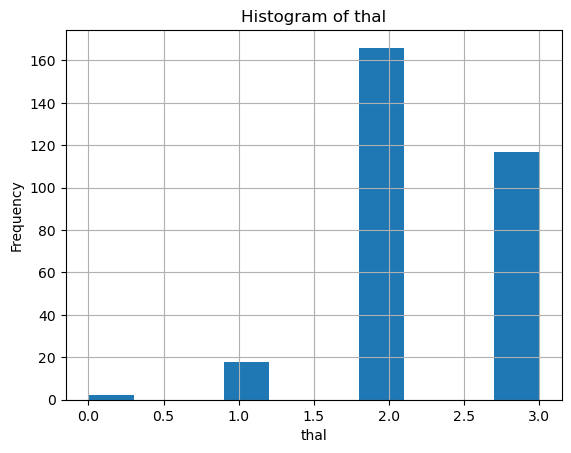

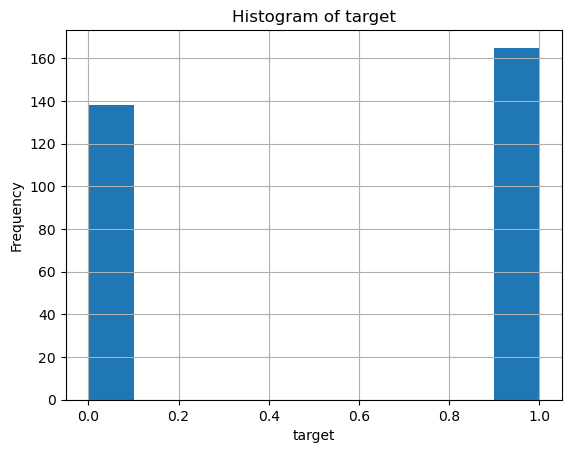

In [7]:
for column in df.columns:
    plt.figure()
    df[column].hist()
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()

<Axes: xlabel='target', ylabel='count'>

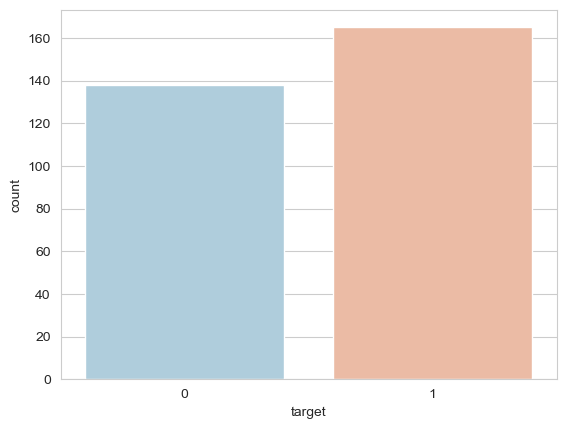

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=df,palette='RdBu_r')

# Data Processing

After exploring the dataset, I observed that I need to convert some categorical variables into dummy variables and scale all the values before training the Machine Learning models.
First, I'll use the `get_dummies` method to create dummy columns for categorical variables.

In [9]:
dataset = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [11]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [12]:
y = dataset['target']
X = dataset.drop(['target'], axis = 1)

## K-Nearest Neighbour

In [13]:
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())

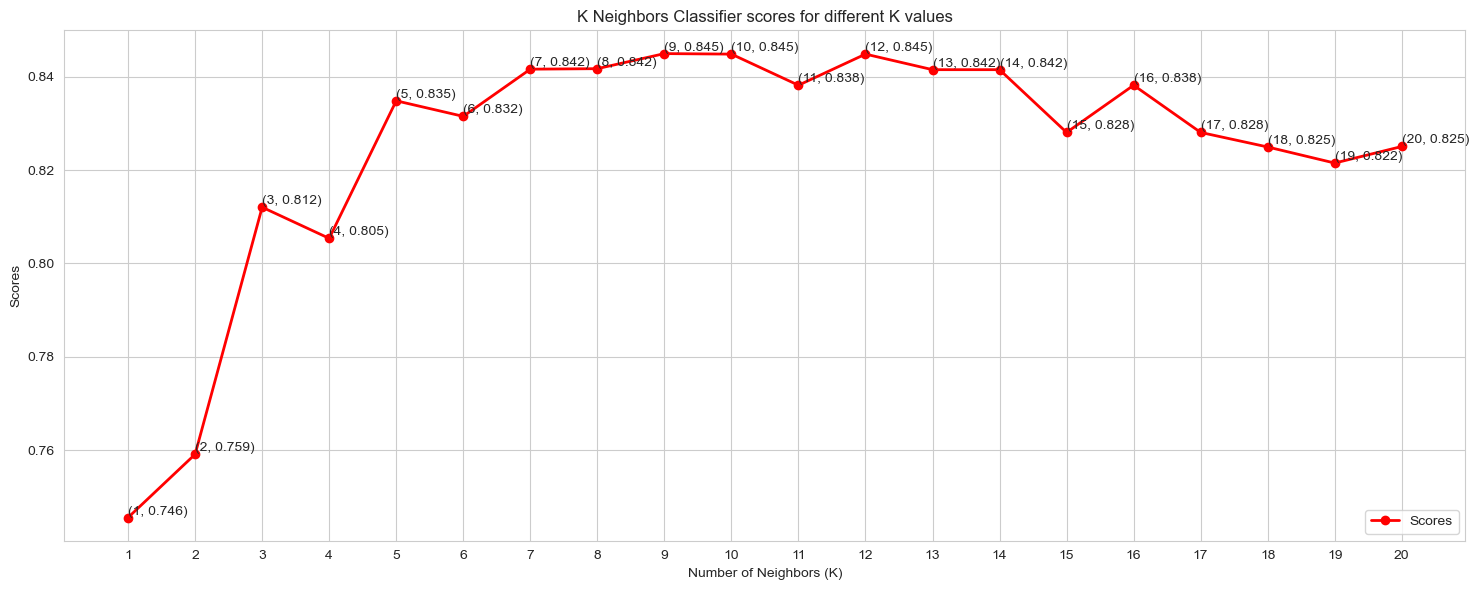

In [14]:
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(range(1, 21), knn_scores, color='red', marker='o', linestyle='-', linewidth=2)

for i in range(1, 21):
    ax.text(i, knn_scores[i-1], f'({i}, {knn_scores[i-1]:.3f})', va='bottom')

ax.set_xticks(range(1, 21))
ax.set_xlabel('Number of Neighbors (K)')
ax.set_ylabel('Scores')
ax.set_title('K Neighbors Classifier scores for different K values')

ax.grid(True)
ax.legend(['Scores'], loc='lower right')
plt.tight_layout()
plt.show()

In [15]:
knn_classifier = KNeighborsClassifier(n_neighbors = 12)
score=cross_val_score(knn_classifier,X,y,cv=10)

In [16]:
score.mean()

0.8448387096774195

## Random Forest Classifier

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

In [24]:
randomforest_classifier= RandomForestClassifier(n_estimators=10)

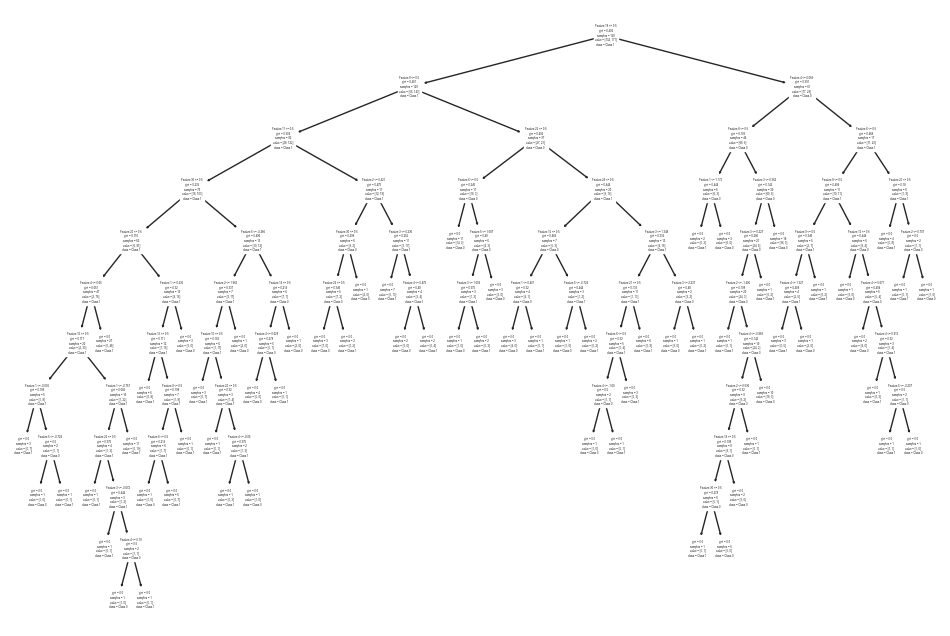

In [38]:
randomforest_classifier.fit(X, y)

# Plot a single decision tree from the Random Forest
plt.figure(figsize=(12, 8))
plot_tree(randomforest_classifier.estimators_[0], feature_names=[f'Feature {i+1}' for i in range(X.shape[1])], class_names=['Class 0', 'Class 1'])
plt.show()

In [39]:
score=cross_val_score(randomforest_classifier,X,y,cv=10)
score.mean()

0.8213978494623657

## Decision Tree Classifier

In [27]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [28]:
decisiontree_classifier= DecisionTreeClassifier()
decisiontree_classifier.fit(X,y)

DecisionTreeClassifier()

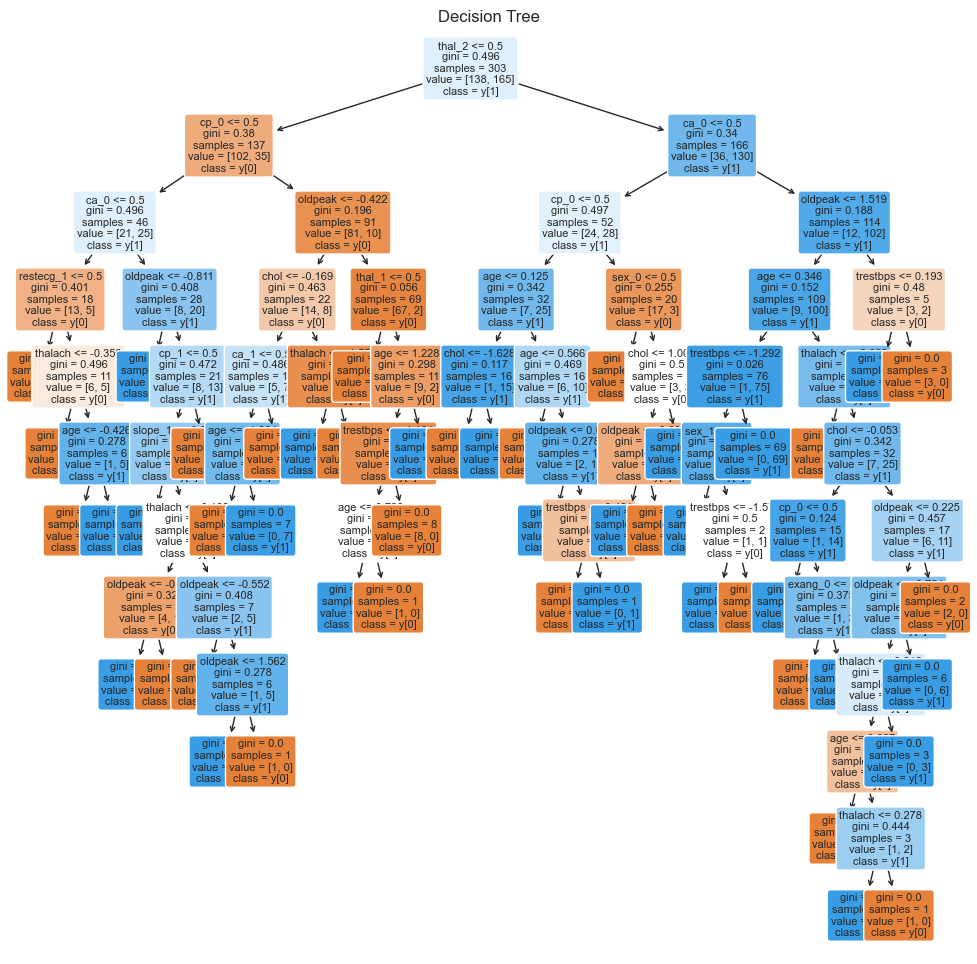

In [30]:
# Plot the decision tree
fig, ax = plt.subplots(figsize=(12, 12))
plot_tree(decisiontree_classifier, ax=ax, filled=True, rounded=True, fontsize=8, feature_names=X.columns, class_names=True)

# Customize the plot
ax.set_title('Decision Tree')
plt.show()

In [31]:
score=cross_val_score(randomforest_classifier,X,y,cv=10)
score.mean()

0.8020430107526882

## Logistic Regression Classifier

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [33]:
# Create and fit the logistic regression model
logisticregression_classifier = LogisticRegression()
logisticregression_classifier.fit(X,y)

LogisticRegression()

In [34]:
# Calculate the accuracy of the model
score=cross_val_score(logisticregression_classifier,X,y,cv=10)
score.mean()

0.8511827956989247